# TP 2 Machine Learning
# Analyse en composantes principales, classification et reconstruction (PCA) 
## $ Auteur: $
### $ Koussaila$ $KADI$ 
### $ kadi.koussaila@outlook.fr $

## Résumé: 
Analyse en composante principales:
* 1. récupérer les données du TP1 (dataset contenant 1288 images)
* 2. déviser la dataset en 75% pour Training set, et 25% pour test set
* 3. faire une PCA pour notre base de traninig et appliquer les données réduites dans un modèle KNN, et comparer entre la traning set sans PCA et avec PCA en terme de précision et de temps d'exécusion. 
La PCA réduit les dimensions de notre base d'apprentissage ce qui réduit le temps d'entraienement, et quand on parle de la précision, il faut choisir avec perténance le nombre de dimension à garder pour ne pas perdre beaucoup en précision.
* 4. compression des images avec la PCA (réduction de dimensions des images) 
* 5. reconstruction des images et comparaison en terme de qualité
* 6. évaluation de l'erreur de reconstruction après compression de l'image

In [1]:
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time

In [2]:
def plot_gallery(images):
#Affiche les 12 premières images contenues dans images
#images est de taille Nb image*Ny*Nx
  plt.figure(figsize=(7.2, 7.2))
  plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
  for i in range(12):
    plt.subplot(3, 4, i + 1)
    plt.imshow(images[i], cmap=plt.cm.gray)
    plt.xticks(())
    plt.yticks(())
  plt.show()

In [3]:
#téléchargé la base de données
[X, y, name]=np.load("TP1.npy",allow_pickle=True )

In [4]:
#affichage des noms des 7 personnes:
print("les noms des personnes utilisés dans notre base de données sont :\n",pd.DataFrame.from_dict({"noms :":name}))
print("Donc on constate qu'on a un problème de classification avec 7 classes\n")

les noms des personnes utilisés dans notre base de données sont :
               noms :
0       Ariel Sharon
1       Colin Powell
2    Donald Rumsfeld
3      George W Bush
4  Gerhard Schroeder
5        Hugo Chavez
6         Tony Blair
Donc on constate qu'on a un problème de classification avec 7 classes



In [5]:
#diviser ma dataset sur 2 portions, une pour l'apprentissage et l'autre pour le test
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.25, random_state=42)

res="on a divisé notre dataset sur 2 partie, la première pour l'apprentissage avec 75%\n"
res+="la deuxième pour les testes avec 25%\n"
res+="test des dimensions\n-------------------\n"
res+="dimension X_train: {}, X_test: {}\n".format(np.shape(X_train),np.shape(X_test))
res+="dimension y_train: {}, y_test: {}\n".format(np.shape(y_train),np.shape(y_test))
print(res)

on a divisé notre dataset sur 2 partie, la première pour l'apprentissage avec 75%
la deuxième pour les testes avec 25%
test des dimensions
-------------------
dimension X_train: (966, 62, 47), X_test: (322, 62, 47)
dimension y_train: (966,), y_test: (322,)



In [6]:
#victoriser notre training set: 
X_train = np.reshape(X_train,(X_train.shape[0],2914)) 
X_test = np.reshape(X_test,(X_test.shape[0],2914)) 
res="reshape - rendre les images sous formes des vecteurs au lieu des matrices\n" 
res+="chaque image est de taille 67X42 => vecteur = 2914\n" 
res+="la nouvelle dimension de X_train: {}:".format(np.shape(X_train))
print(res)

reshape - rendre les images sous formes des vecteurs au lieu des matrices
chaque image est de taille 67X42 => vecteur = 2914
la nouvelle dimension de X_train: (966, 2914):


# II- PCA
## Analyse en composante principale PCA


In [7]:
# Normaliser les données :
scaler = StandardScaler()
scaler.fit(X_train) 

#transform
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

X_train shape: (966, 2914)
shape de ratio: (966,)
shape de X_train_cpa: (966, 966)
shape de X_test_cpa: (322, 966)
la somme de ratio=1 car on a pris toutes les composantes: 0.99999976


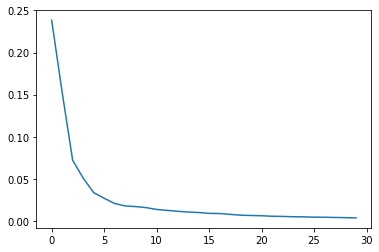

In [8]:
print("X_train shape:",X_train.shape)
# définition de la PCA

pca_1=PCA()
pca_1.fit(X_train)
X_train1=pca_1.transform(X_train)
X_test1=pca_1.transform(X_test)
plt.plot(pca_1.explained_variance_ratio_[0:30])

print("shape de ratio:",pca_1.explained_variance_ratio_.shape)
print("shape de X_train_cpa:",X_train1.shape)
print("shape de X_test_cpa:",X_test1.shape)

print("la somme de ratio=1 car on a pris toutes les composantes:",np.sum(pca_1.explained_variance_ratio_))


X_train shape: (966, 2914)
shape de ration: (100,)
shape de X_train_cpa: (966, 100)
shape de X_test_cpa: (322, 100)
la somme de ratio <1 car on a pas pris toutes les composantes: 0.9177196


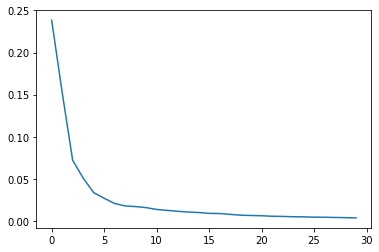

In [9]:
# définition de la PCA en concervant 100 composantes
print("X_train shape:",X_train.shape)
# définition de la PCA

pca_2=PCA(n_components=100)
pca_2.fit(X_train)
X_train2=pca_2.transform(X_train)
X_test2=pca_2.transform(X_test)
plt.plot(pca_2.explained_variance_ratio_[0:30])

print("shape de ration:",pca_2.explained_variance_ratio_.shape)
print("shape de X_train_cpa:",X_train2.shape)
print("shape de X_test_cpa:",X_test2.shape)

print("la somme de ratio <1 car on a pas pris toutes les composantes:",np.sum(pca_2.explained_variance_ratio_))


In [10]:
#classifieur: avec la distance de manhatan
#sans la pca
tps1_avant = time.time()

classifieur=KNN(n_neighbors=5,p=2) 
classifieur.fit(X_train,y_train)

tps1_apres=  time.time()
print("Durée de classification",1000*(tps1_apres-tps1_avant),"ms")

score=classifieur.score(X_test,y_test)
print("le score de la classification",score)

Durée de classification 370.272159576416 ms
le score de la classification 0.6273291925465838


In [11]:
#classifieur: avec la distance de manhatan
#mesurer le temps d'éxécution: avec les données sans la PCA
tps1_avant_pca = time.time()

classifieur=KNN(n_neighbors=5,p=2) 
classifieur.fit(X_train2,y_train)

tps1_apres_pca=  time.time()
print("Durée de classification",1000*(tps1_apres_pca-tps1_avant_pca),"ms")

score=classifieur.score(X_test2,y_test)
print("le score de la classification",score)

Durée de classification 18.30768585205078 ms
le score de la classification 0.6273291925465838


# III- compression: 

X_train shape: (966, 2914)
shape de ration: (50,)
shape de X_train_cpa: (966, 50)
shape de X_test_cpa: (322, 50)
la somme de ratio <1 car on a pas pris toutes les composantes: 0.8509205


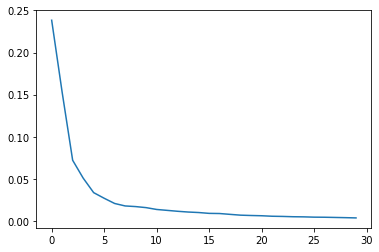

In [12]:
# définition de la PCA en concervant 100 composantes
print("X_train shape:",X_train.shape)
# définition de la PCA

pca_3=PCA(n_components=50)
pca_3.fit(X_train)
X_train3=pca_3.transform(X_train)
X_test3=pca_3.transform(X_test)
plt.plot(pca_3.explained_variance_ratio_[0:30])

print("shape de ration:",pca_3.explained_variance_ratio_.shape)
print("shape de X_train_cpa:",X_train3.shape)
print("shape de X_test_cpa:",X_test3.shape)

print("la somme de ratio <1 car on a pas pris toutes les composantes:",np.sum(pca_3.explained_variance_ratio_))

shape vecteurs propres: (50, 2914)
shape images propres: (50, 62, 47)


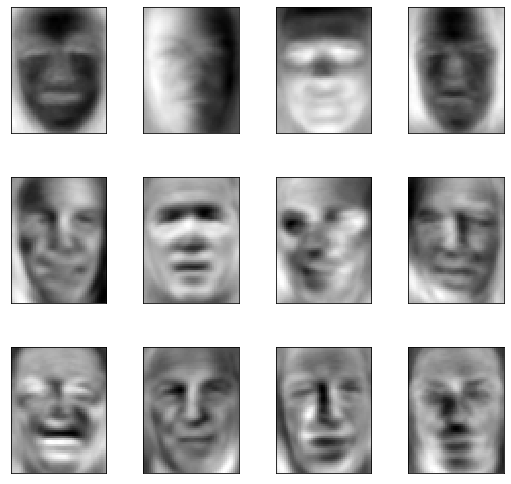

In [13]:
#récupérer les vecteurs propres: 
vect=pca_3.components_ 
print("shape vecteurs propres:", vect.shape)

#faire un reshape pour récupérer les images:
images=np.reshape(vect,(vect.shape[0],62,47))
print("shape images propres:",images.shape)

#display des images
plot_gallery(images)

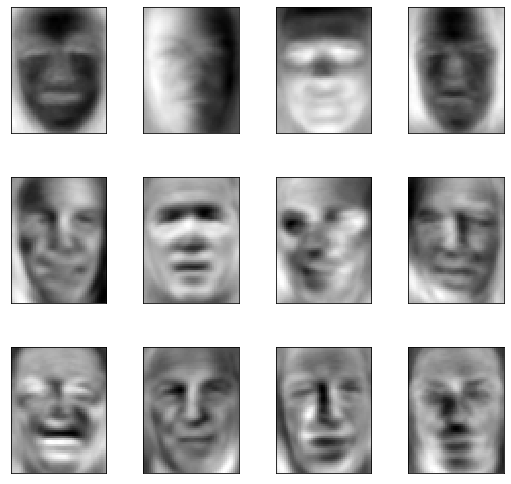

In [14]:
#----------------compression----------------------

# transformer les images de test sur 50 composantes
X_testC=pca_3.transform(X_test)

vect=pca_3.components_
imagesC= np.reshape(vect,(vect.shape[0],62,47))
#display des images
plot_gallery(imagesC)


shape vecteurs propres: (50, 2914)
shape images propres: (322, 62, 47)


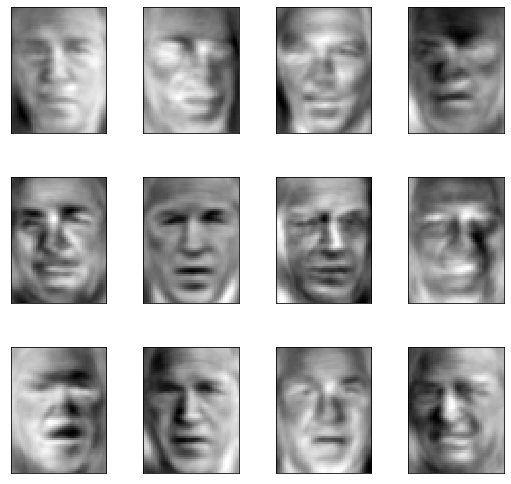

In [15]:

#--------------récupération----------------------
X_testR=pca_3.inverse_transform(X_testC)

#récupérer les vecteurs propres: 
vect=pca_3.components_ 
print("shape vecteurs propres:", vect.shape)

#faire un reshape pour récupérer les images:
imagesR= np.reshape(X_testR,(X_testR.shape[0],62,47))
print("shape images propres:",imagesR.shape)

#plot images:
plot_gallery(imagesR)

### comparaison des images initiales et reconstruites de manière qualitative: 

In [16]:
E= (X_testR-X_test)**2
E = np.mean(np.sqrt(np.sum(E,axis=0)))
print("Erreur :",E)

#on diminuant la dimension des féatures, l'erreur de construction augmente. 
print(X_testC.shape)
print(X_test.shape)

taux_compression=X_test.shape[1]/X_testC.shape[1]
print("le taux de compression: {}%".format(taux_compression))

Erreur : 7.4937105
(322, 50)
(322, 2914)
le taux de compression: 58.28%


In [26]:
Erreur=[]
comp=[]
for n in range(10,950,50):
    pca_k=PCA(n_components=n)
    pca_k.fit(X_train)
    X_testC_k=pca_k.transform(X_test)

    #trasformation inverse:
    X_testR_k=pca_k.inverse_transform(X_testC_k)
    #calcul d'erreur:
    E= (X_testR_k-X_test)**2
    E = np.mean(np.sqrt(np.sum(E,axis=0)))
    Erreur.append(E)
    comp.append(n)

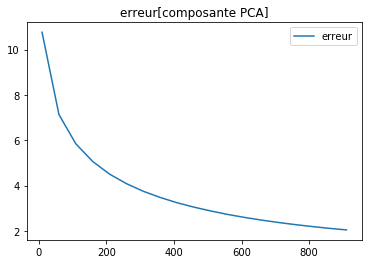

In [28]:
#tracé de l'erreur de construction en fonction de nombre de composantes: 
plt.plot(comp,Erreur,label="erreur") 
plt.title("erreur[composante PCA]")
plt.legend()
plt.show()

On constate que l'erreur de construction diminue en augmentant la dimension de notre X_test c'est à dire on augmentant le nombre de composantes de notre PCA. 